In [1]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))

In [7]:
from pathlib import Path

# dir_github = Path(r'/n/data1/hms/neurobio/sabatini/gyu/github_clone').resolve()
# dir_bnpm = Path(r'/n/data1/hms/neurobio/sabatini/gyu/github_clone/basic_neural_processing_modules').resolve()
# dir_roicat = Path(r'/n/data1/hms/neurobio/sabatini/gyu/github_clone/ROICaT').resolve()
# dir_seqnmf = Path(r'/n/data1/hms/neurobio/sabatini/gyu/github_clone/Mothership_Zeta/MZ/analysis')
dir_github = Path(r'/n/data1/hms/neurobio/sabatini/gyu/github_clone')
dir_mothership = Path(r'/n/data1/hms/neurobio/sabatini/gyu/github_clone/Mothership_Zeta/MZ')
dir_analysis = Path(r'/n/data1/hms/neurobio/sabatini/gyu/github_clone/Mothership_Zeta/MZ/analysis')



import sys
sys.path.append(str(dir_github))
sys.path.append(str(dir_mothership))
# sys.path.append(str(dir_bnpm))
# sys.path.append(str(dir_roicat))
# sys.path.append(str(dir_seqnmf))
sys.path.append(str(dir_analysis))

In [8]:
%load_ext autoreload
%autoreload 2
import seqnmf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%load_ext autoreload
%autoreload 2
from utils.basic_neural_processing_modules import file_helpers,torch_helpers,timeSeries,ca2p_preprocessing,welford_moving_2D,linear_regression,similarity

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [4]:
dir_analysisFiles = Path(r'/n/data1/hms/neurobio/sabatini/gyu/analysis/suite2p_output/tester/20221113/scanimage_data/exp/jobNum_0/suite2p/plane0').resolve()

## Directory with F.npy, stat.npy etc.
dir_s2p         = Path(r'/n/data1/hms/neurobio/sabatini/gyu/analysis/suite2p_output/tester/20221113/scanimage_data/exp/jobNum_0/suite2p/plane0').resolve()

## Path of iscell. Can be from neural net output (iscell_NN)
path_iscell = dir_analysisFiles / 'iscell_NN_tqm.npy'

## Path of tqm (trace quality metrics). Used to get dFoF parameters
path_tqm = dir_analysisFiles / 'trace_quality.pkl'

In [5]:
%reload_ext autoreload
from utils.Big_Ugly_ROI_Tracker.multiEps.multiEps_modules import *

In [10]:
DEVICE = torch_helpers.set_device(use_GPU=True)

devices available: [_CudaDeviceProperties(name='Tesla V100-SXM2-16GB', major=7, minor=0, total_memory=16160MB, multi_processor_count=80)]
Using device: 'cuda:0': _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', major=7, minor=0, total_memory=16160MB, multi_processor_count=80)


In [11]:
iscell = np.load(path_iscell)
dFoF_params = file_helpers.pickle_load(path_tqm)['dFoF_params']

In [12]:
iscell

array([False, False, False, ..., False, False, False])

In [111]:
dir_s2p = Path(r"/n/data1/hms/neurobio/sabatini/gyu/analysis/suite2p_output/tester/20221113/scanimage_data/exp/jobNum_0/suite2p/plane0").resolve()

[autoreload of Mothership_Zeta.MZ.analysis.seqNMF.batch_run_seqNMF failed: Traceback (most recent call last):
  File "/home/gyh930/.conda/envs/ROICaT/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/gyh930/.conda/envs/ROICaT/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/home/gyh930/.conda/envs/ROICaT/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/n/data1/hms/neurobio/sabatini/gyu/github_clone/Mothership_Zeta/MZ

In [25]:
# Load ROICaT result
import pickle
roicater = "/n/data1/hms/neurobio/sabatini/gyu/analysis/suite2p_output/tester/tester.ROICaT.results.pkl"
with open(roicater, "rb") as handle:
    tracker = pickle.load(handle)

In [26]:
tracker.keys()

dict_keys(['UCIDs', 'UCIDs_bySession', 'ROIs', 'Paths'])

In [28]:
tracker['Paths']

[PosixPath('/n/data1/hms/neurobio/sabatini/gyu/analysis/suite2p_output/tester/20221112/scanimage_data/baseline/jobNum_0/suite2p/plane0/stat.npy'),
 PosixPath('/n/data1/hms/neurobio/sabatini/gyu/analysis/suite2p_output/tester/20221112/scanimage_data/exp/jobNum_0/suite2p/plane0/stat.npy'),
 PosixPath('/n/data1/hms/neurobio/sabatini/gyu/analysis/suite2p_output/tester/20221112/scanimage_data/post/jobNum_0/suite2p/plane0/stat.npy'),
 PosixPath('/n/data1/hms/neurobio/sabatini/gyu/analysis/suite2p_output/tester/20221113/scanimage_data/baseline/jobNum_0/suite2p/plane0/stat.npy'),
 PosixPath('/n/data1/hms/neurobio/sabatini/gyu/analysis/suite2p_output/tester/20221113/scanimage_data/exp/jobNum_0/suite2p/plane0/stat.npy'),
 PosixPath('/n/data1/hms/neurobio/sabatini/gyu/analysis/suite2p_output/tester/20221113/scanimage_data/post/jobNum_0/suite2p/plane0/stat.npy')]

In [55]:
session_index = [parts.isdigit() for parts in dir_s2p.parts]
session_date = dir_s2p.parts[np.nonzero(session_index)[0][0]]

In [113]:
dir_s2p.parts[np.nonzero(session_index)[0][0]-1]

'tester'

In [58]:
session_date in str(tracker['Paths'][4])

True

In [59]:
roicat_bool = [session_date in str(track) for track in tracker["Paths"]]

In [67]:
roi_session_list = []
for index, track in enumerate(tracker["Paths"]):
    if session_date in str(track):
        roi_session_list.append(tracker["UCIDs_bySession"][index])

In [68]:
roi_sessions = np.concatenate(roi_session_list)

In [80]:
UCIDs, UCIDs_counts = np.unique(roi_sessions, return_counts=True)

In [81]:
UCIDs

array([  -1,    0,    1, ..., 7569, 7573, 7576])

In [82]:
UCIDs_counts

array([1596,    3,    3, ...,    2,    2,    2])

In [91]:
tracked_UCIDs_idx = UCIDs_counts==len(roi_session_list)

In [114]:
test = UCIDs[UCIDs_counts==len(roi_session_list)]

In [92]:
tracked_UCIDs = UCIDs[tracked_UCIDs_idx]

In [115]:
test == tracked_UCIDs

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
any(e in list2 for e in list1)

In [99]:
roi_istracked = []
for roi_session in roi_session_list:
    tracked = [roi in tracked_UCIDs for roi in roi_session]
    roi_istracked.append(tracked)

In [100]:
roi_istracked

[[True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  Tru

In [101]:
len(iscell)

3559

In [102]:
len(roi_istracked[1])

3559

In [106]:
test = np.multiply(iscell,roi_istracked[1])

In [110]:
np.nonzero(test)[0].shape

(164,)

In [116]:
np.nonzero(iscell)[0].shape

(264,)

In [118]:
iscell = np.multiply(iscell,roi_istracked[1])
np.nonzero(iscell)[0].shape

(164,)

In [8]:
## == IMPORT DATA ==
F = np.load(dir_s2p / 'F.npy') # masks multiplied by data
Fneu = np.load(dir_s2p / 'Fneu.npy') # estimated neuropil signal (Fns = F - Fneu; Fo = ptile(Fns, 30); dFoF=Fns-Fo/Fo)
# iscell = np.load(dir_s2p/'iscell.npy') # probability and bool of each roi
ops = np.load(dir_s2p / 'ops.npy', allow_pickle=True) # parameters for the suite2p
spks_s2p = np.load(dir_s2p / 'spks.npy') # blind deconvolution
stat = np.load(dir_s2p / 'stat.npy', allow_pickle=True) # statistics for individual neurons 

num_frames_S2p = F.shape[1]
Fs = ops[()]['fs']

In [11]:
frame_height = ops[()]['meanImg'].shape[0]
frame_width = ops[()]['meanImg'].shape[1]

sf = import_and_convert_to_CellReg_spatialFootprints([dir_s2p / 'stat.npy'], frame_height=frame_height, frame_width=frame_width, dtype=np.float32)[0]

In [12]:
F_toUse = F[iscell]
Fneu_toUse = Fneu[iscell]

In [13]:
win_smooth = 4
kernel_smoothing = np.zeros(win_smooth*2)
kernel_smoothing[win_smooth:] = 1
kernel_smoothing /= kernel_smoothing.sum()

In [14]:
# Pipeline for the NMF Strategy 
# Smooth F
F_smooth = timeSeries.convolve_along_axis(F_toUse,
                                             kernel=kernel_smoothing,
                                             axis=1,mode='same',
                                             multicore_pref=True,
                                             verbose=True).astype(np.float32)

# dFoF with reduced percentile for baseline
channelOffset_correction = 500
percentile_baseline = 5
neuropil_fraction=0.7

dFoF , dF , F_neuSub , F_baseline = ca2p_preprocessing.make_dFoF(F=F_smooth + channelOffset_correction,
                                                                 Fneu=Fneu_toUse + channelOffset_correction,
                                                                 neuropil_fraction=neuropil_fraction,
                                                                 percentile_baseline=percentile_baseline,
                                                                 multicore_pref=True,
                                                                 verbose=True)
# Threshold for nonnegativity
dFoF[dFoF<0]=0

ThreadPool elapsed time : 0.06 s. Now unpacking list into array.
Calculated convolution. Total elapsed time: 0.09 seconds
Calculated dFoF. Total elapsed time: 8.4 seconds


In [15]:
# Test out rolling subtraction of the 10th percentile of the data to remove microscope movement artifacts

ptile = 10
window = int(Fs*60*1)

dFoF_sub_ptile = dFoF - timeSeries.rolling_percentile_pd(dFoF, ptile=ptile, window=window)

In [16]:
neural_data_toUse = (dFoF_sub_ptile / np.std(dFoF_sub_ptile,axis=1,keepdims=True))

In [17]:
neural_data_toUse.shape

(97, 108000)

In [18]:
# Pray!
rank = 10

In [23]:
neural_data_toUse[neural_data_toUse<0] = 0

<IPython.core.display.Javascript object>


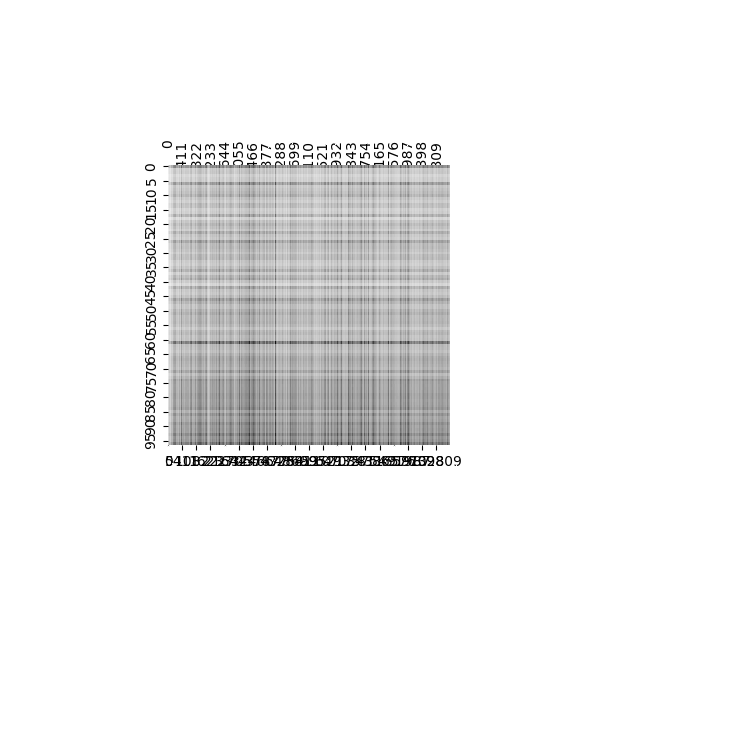

<IPython.core.display.Javascript object>


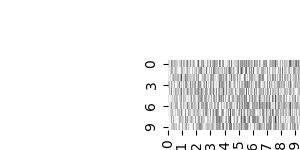

<IPython.core.display.Javascript object>


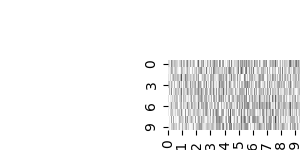

<IPython.core.display.Javascript object>


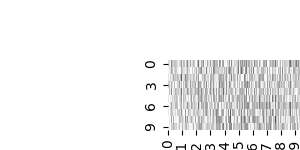

<IPython.core.display.Javascript object>


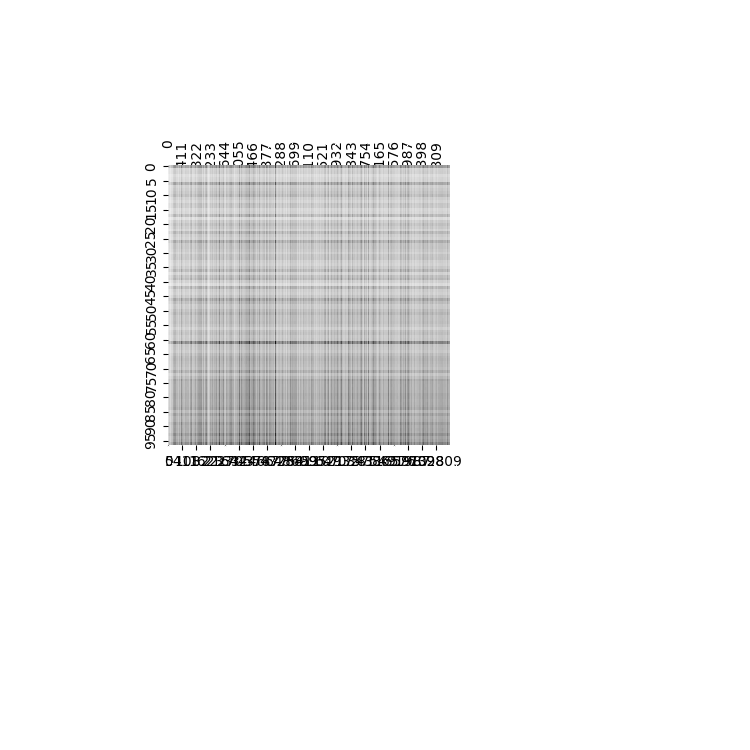

<IPython.core.display.Javascript object>


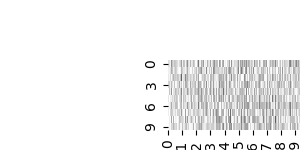

<IPython.core.display.Javascript object>


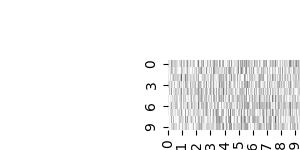

<IPython.core.display.Javascript object>


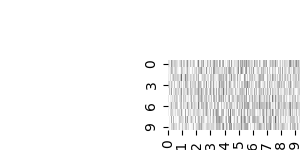

<IPython.core.display.Javascript object>


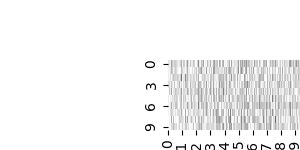

<IPython.core.display.Javascript object>


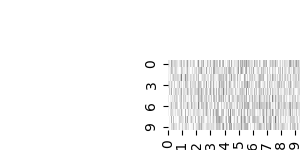

<IPython.core.display.Javascript object>


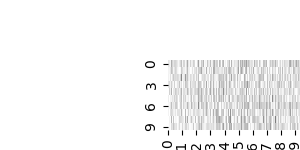

<IPython.core.display.Javascript object>


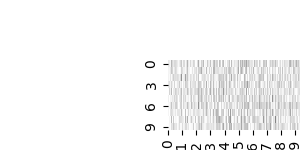

<IPython.core.display.Javascript object>


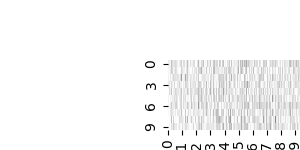

<IPython.core.display.Javascript object>


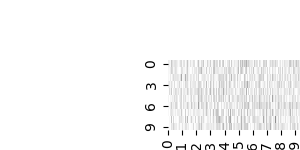

<IPython.core.display.Javascript object>


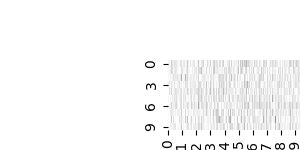

<IPython.core.display.Javascript object>


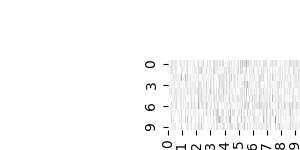

<IPython.core.display.Javascript object>


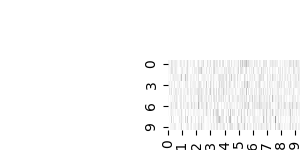

<IPython.core.display.Javascript object>


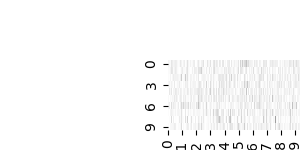

<IPython.core.display.Javascript object>


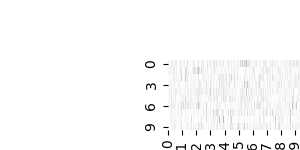

<IPython.core.display.Javascript object>


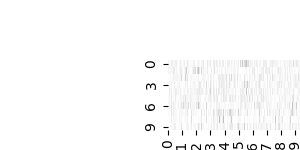

<IPython.core.display.Javascript object>


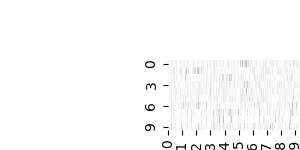

<IPython.core.display.Javascript object>


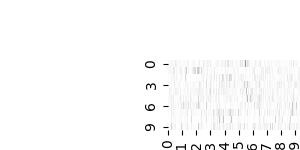

<IPython.core.display.Javascript object>


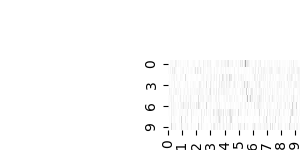

<IPython.core.display.Javascript object>


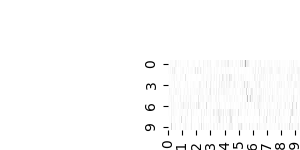

<IPython.core.display.Javascript object>


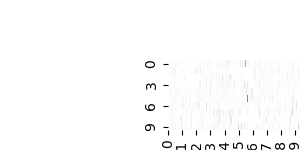

<IPython.core.display.Javascript object>


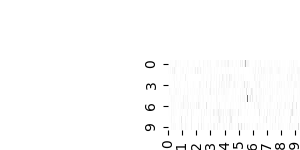

<IPython.core.display.Javascript object>


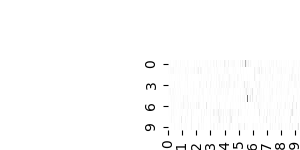

<IPython.core.display.Javascript object>


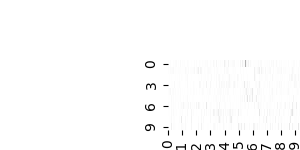

<IPython.core.display.Javascript object>


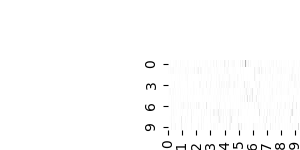

<IPython.core.display.Javascript object>


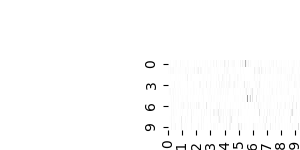

<IPython.core.display.Javascript object>


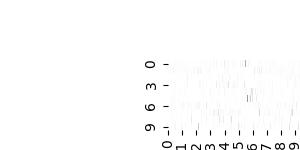

<IPython.core.display.Javascript object>


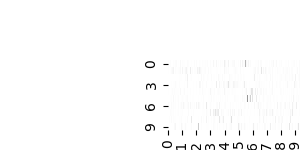

<IPython.core.display.Javascript object>


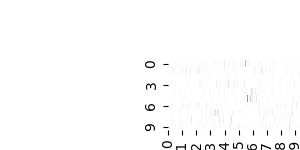

<IPython.core.display.Javascript object>


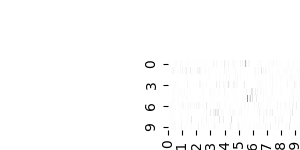

<IPython.core.display.Javascript object>


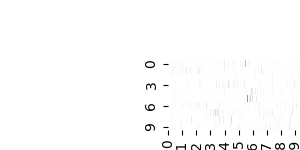

<IPython.core.display.Javascript object>


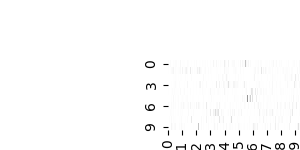

In [ ]:
# Run SeqNMF
W, H, cost, loadings, power = seqnmf.seqnmf(neural_data_toUse, 
                                     K=rank, 
                                     L=100, 
                                     Lambda=.00001, 
                                     W_init=None, 
                                     H_init=None,
                                     plot_it=True, 
                                     max_iter=100, 
                                     tol=-np.inf, 
                                     shift=True, 
                                     sort_factors=True,
                                     lambda_L1W=0, 
                                     lambda_L1H=0, 
                                     lambda_OrthH=0, 
                                     lambda_OrthW=0, 
                                     M=None,
                                     use_W_update=True, 
                                     W_fixed=False)

In [47]:
W.shape

(97, 10, 100)

<IPython.core.display.Javascript object>


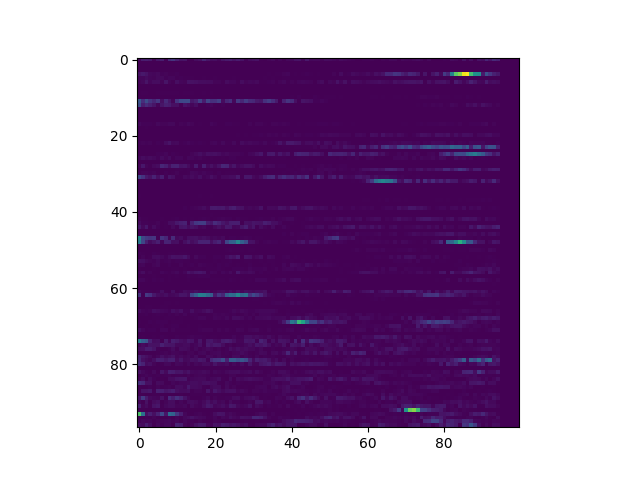

In [54]:
%matplotlib notebook
plt.imshow(W[:,3,:])

In [38]:
H.shape

(10, 108000)

<IPython.core.display.Javascript object>


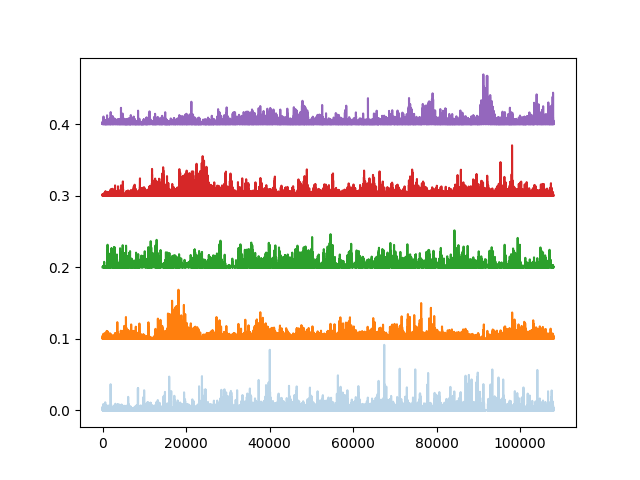

In [50]:
%matplotlib notebook
plt.plot(range(H.shape[1]), H[0,:], alpha=0.3)
plt.plot(range(H.shape[1]), H[1,:] + 0.1)
plt.plot(range(H.shape[1]), H[2,:] + 0.2)
plt.plot(range(H.shape[1]), H[3,:] + 0.3)
plt.plot(range(H.shape[1]), H[4,:] + 0.4)

<IPython.core.display.Javascript object>


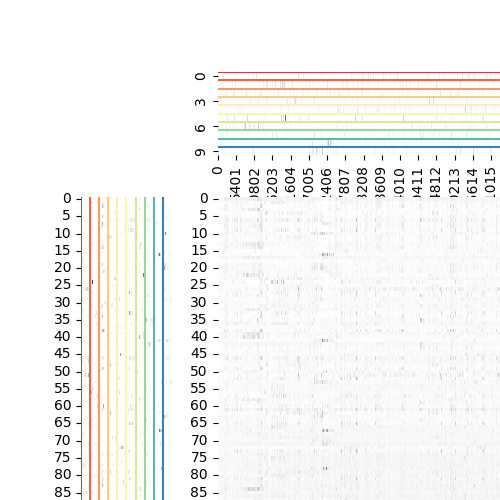

<IPython.core.display.Javascript object>


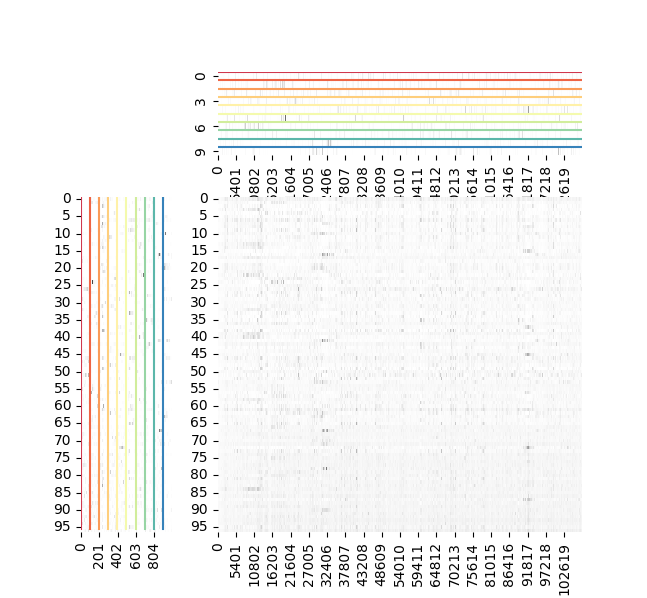

In [57]:
seqnmf.plot(W, H)

In [59]:
seqnmf_result = {"W":W, "H":H, "cost":cost, "loadings":loadings, "power":power}

In [60]:
seqnmf_result

{'W': array([[[1.24104235e-03, 2.35937736e-03, 2.95852427e-03, ...,
          2.55769619e-02, 5.17858832e-02, 1.37091725e-01],
         [1.73591974e-03, 2.57547036e-03, 3.01242488e-03, ...,
          2.08777953e+00, 1.08555511e-01, 5.86912961e-01],
         [1.00079536e-03, 2.63659735e-03, 3.60423041e-03, ...,
          3.16848665e+00, 5.06012487e+00, 1.21827855e+00],
         ...,
         [2.60273796e-03, 2.56636806e-03, 2.60287485e-03, ...,
          1.72451470e-01, 1.22796272e+00, 1.17332168e-04],
         [3.03743109e-01, 4.89554909e-01, 3.94941142e-01, ...,
          2.02670582e-03, 1.88284554e-03, 1.16602767e-03],
         [1.01847491e-03, 1.05169189e-03, 1.12706224e-03, ...,
          8.87298612e-02, 1.96865355e-01, 2.27309809e-01]],
 
        [[3.13720018e-04, 3.16152151e-04, 3.05129153e-04, ...,
          4.67812036e-04, 7.27942588e-04, 5.25040406e-04],
         [1.61080444e-03, 2.43072517e-03, 3.10467648e-03, ...,
          6.59854700e-01, 5.51045538e-01, 5.70738279e-02],
  

In [58]:
import pickle

In [62]:
with open ("/n/data1/hms/neurobio/sabatini/gyu/github_clone/seqnmf/20221118_test.p", 'wb') as handle:
    pickle.dump(seqnmf_result,handle)